In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('resources/qr-code-02.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


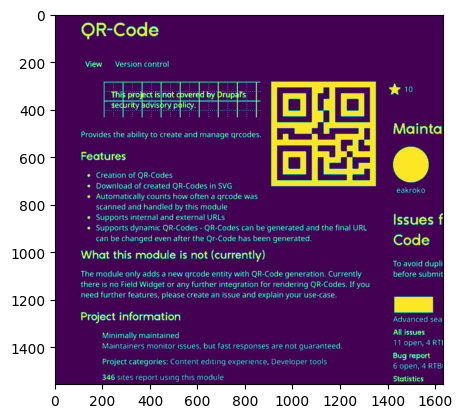

In [7]:
plt.imshow(thresh)

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


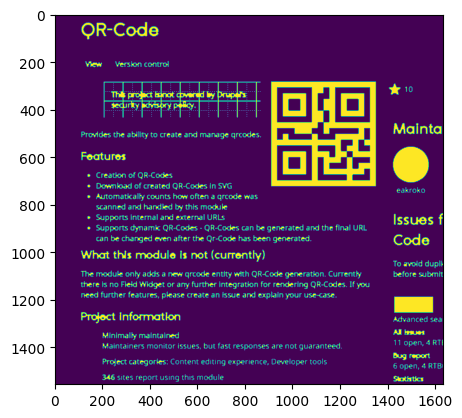

In [9]:
plt.imshow(closed)

In [12]:
cropped = None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    if len(approx) == 4:
        area = cv2.contourArea(contour)
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)

        if area > 100 and 0.8 <= aspect_ratio <= 1.2:
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)

            cropped = image[y:y + h, x:x + w]


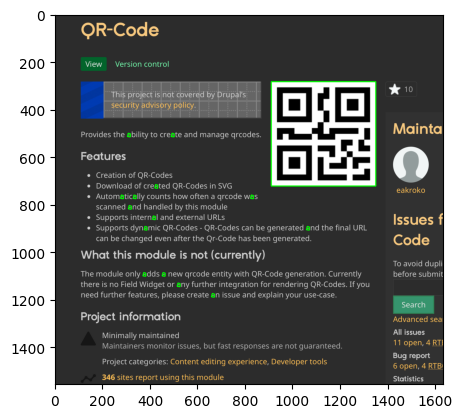

In [13]:
plt.imshow(image)


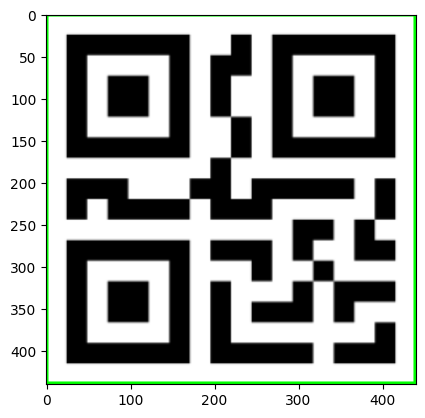

In [14]:
plt.imshow(cropped)